# Kaggle Titanic: 2 - Data Analysis

## Imports

### Univariate Analysis


=== Univariate Analysis ===


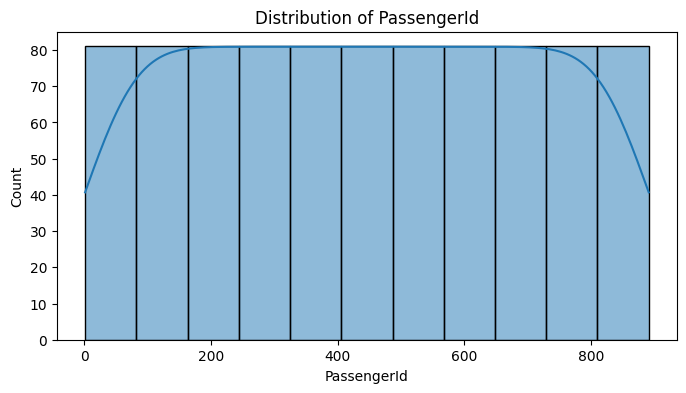

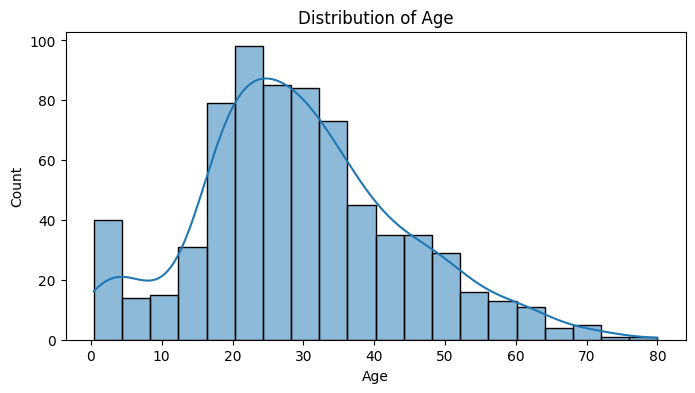

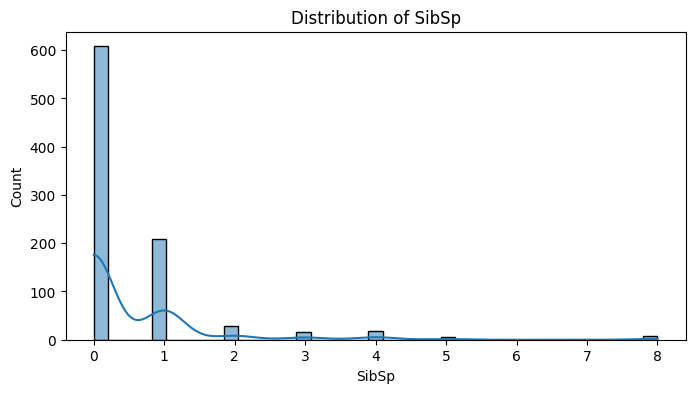

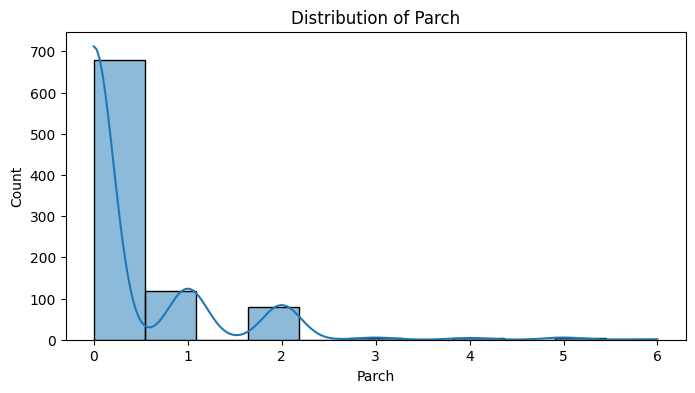

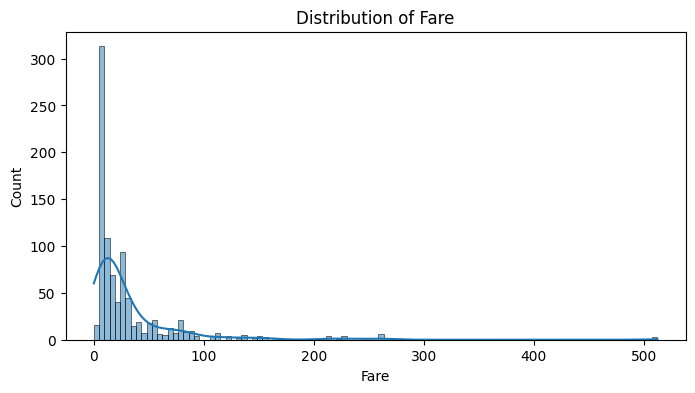

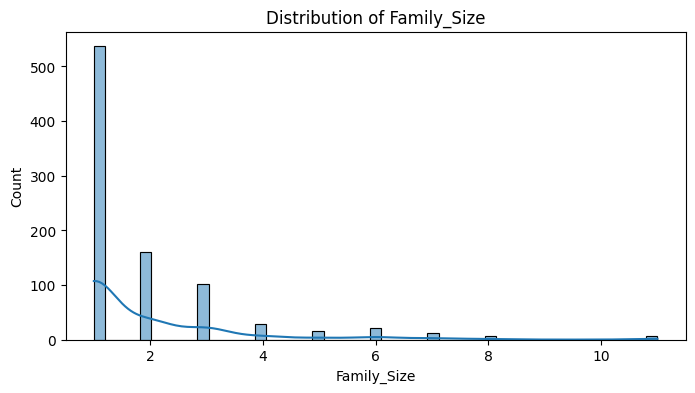

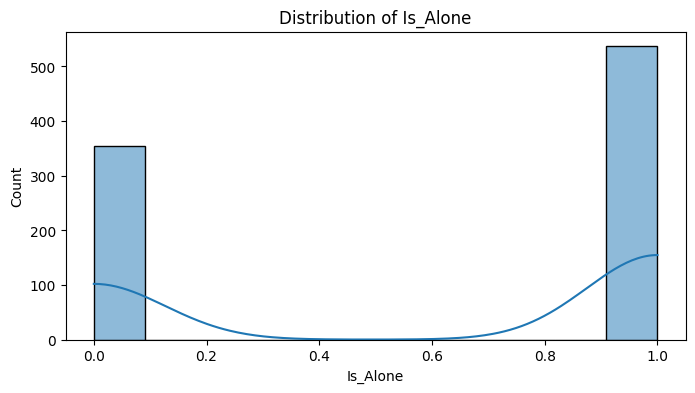

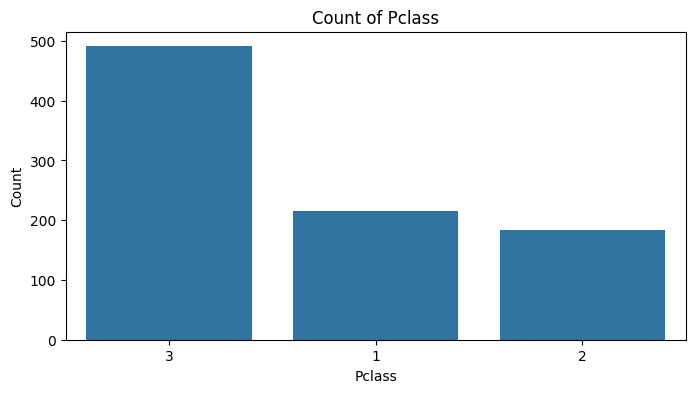

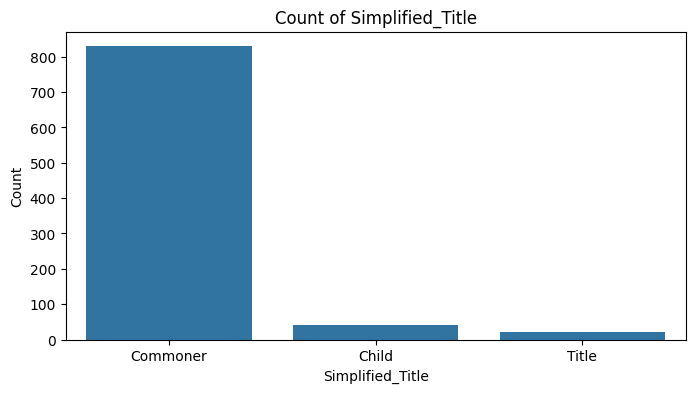

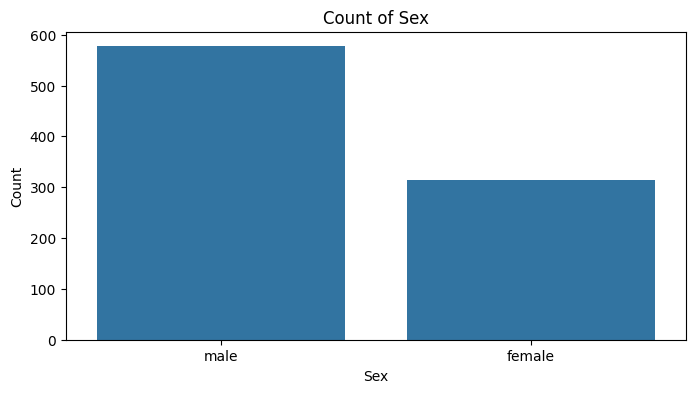

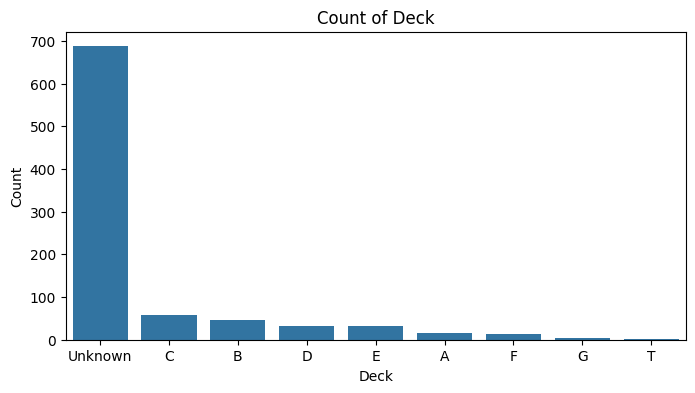

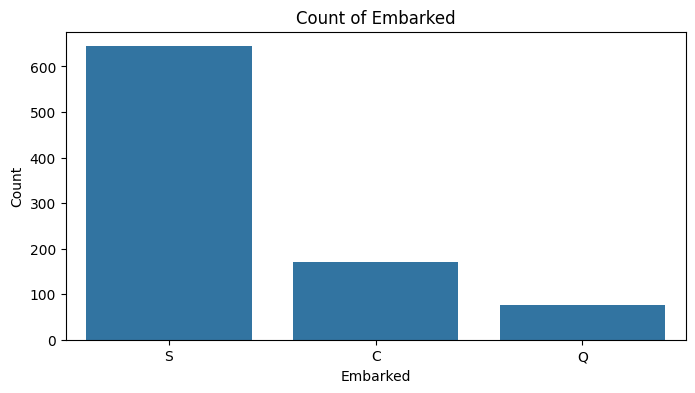

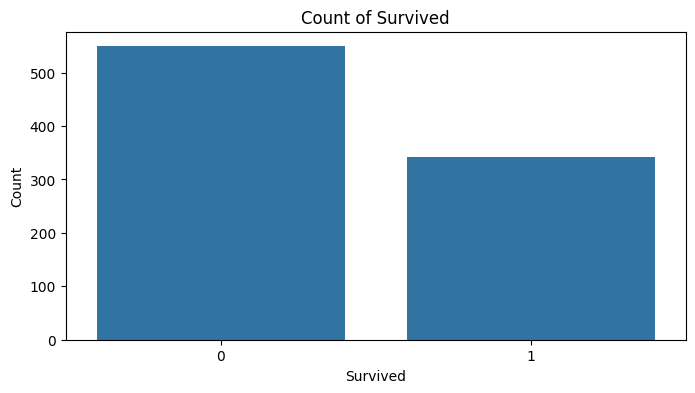

In [203]:
# Univariate Analysis
print("\n=== Univariate Analysis ===")

# Distribution of Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Counts of Categorical Features
for feature in categorical_features + [target]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train, x=feature, order=train[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


#### Bivariate Analysis vs Target


=== Bivariate Analysis ===


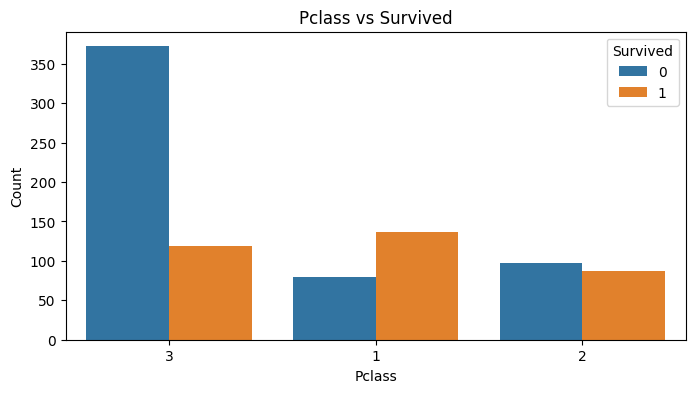

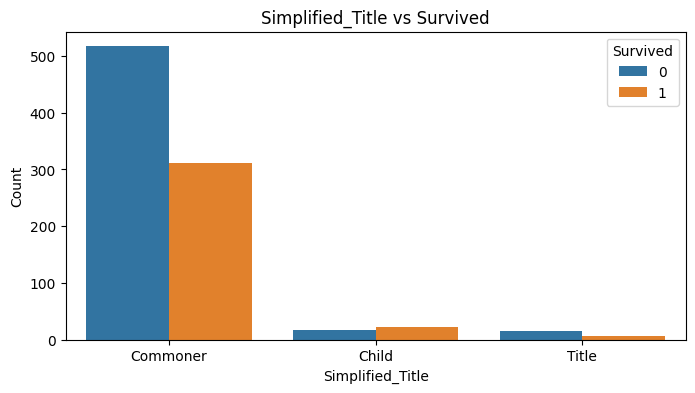

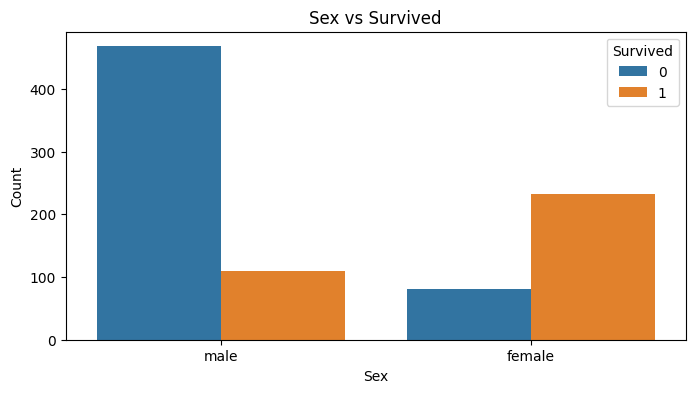

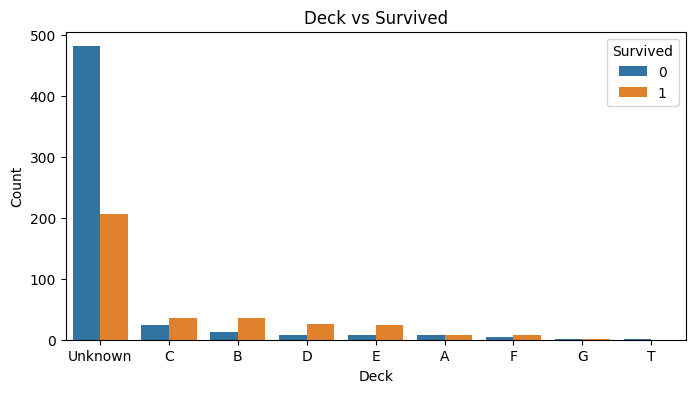

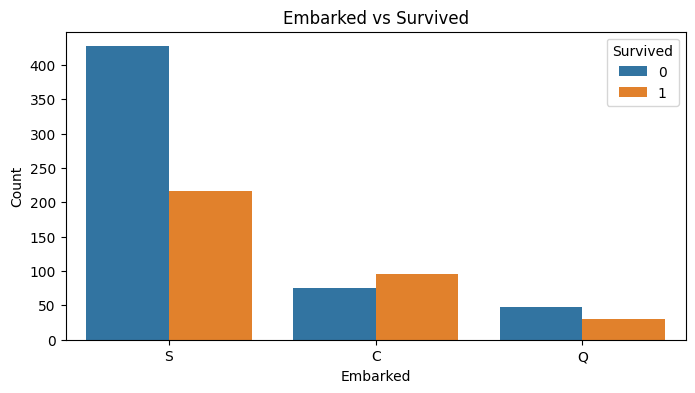

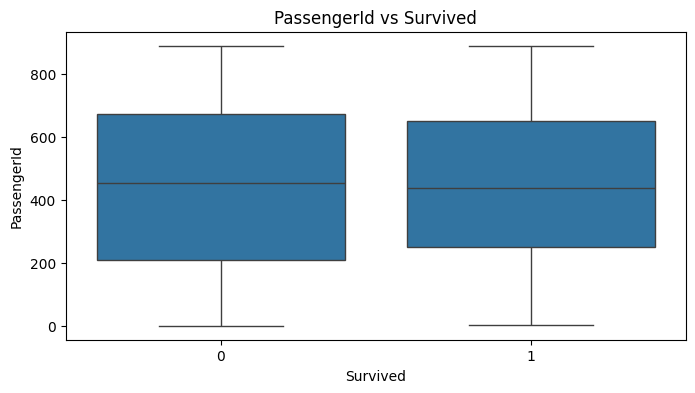

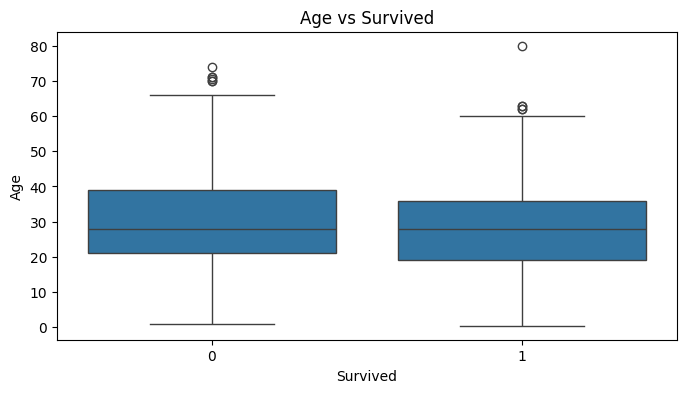

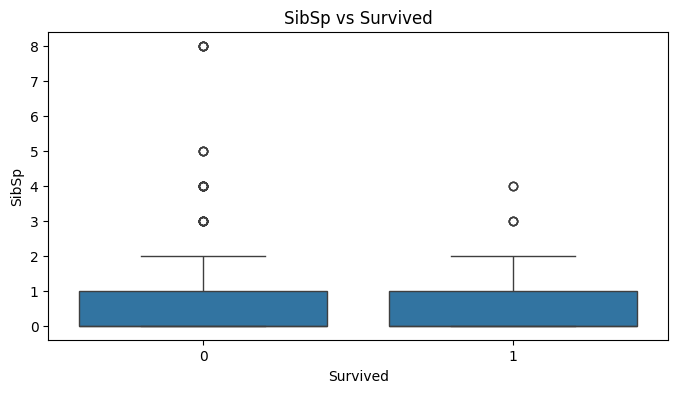

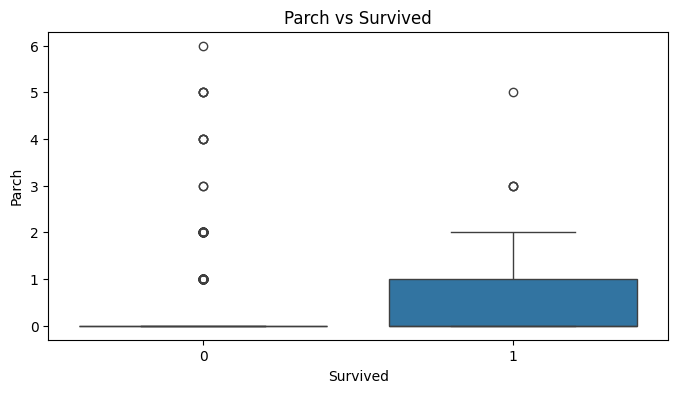

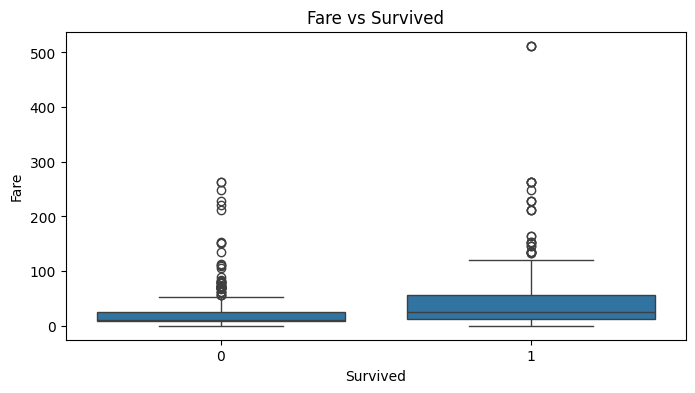

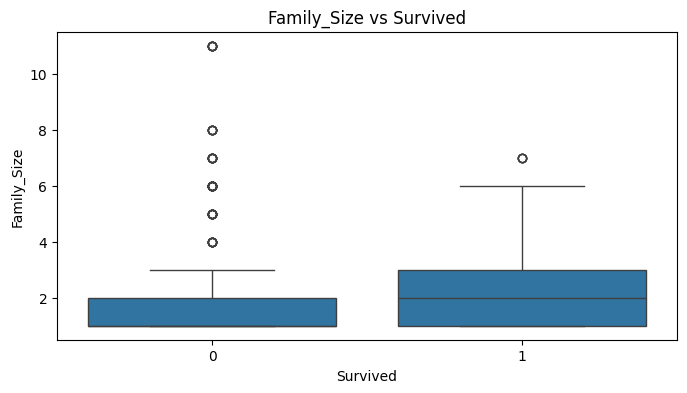

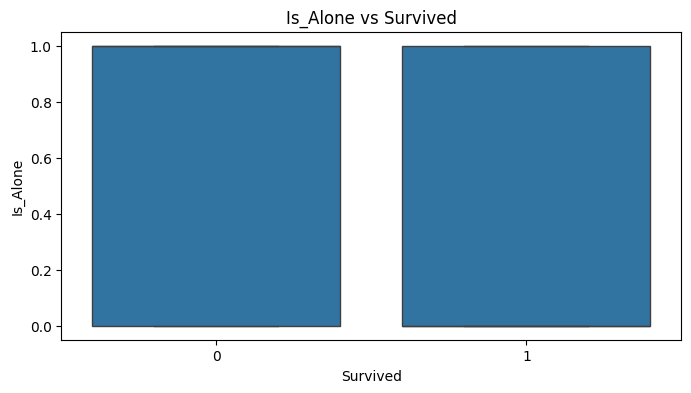

In [204]:
# Bivariate Analysis
print("\n=== Bivariate Analysis ===")

# Relationship between Categorical Features and Target
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train, x=feature, hue=target, order=train[feature].value_counts().index)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target)
    plt.show()

# Relationship between Numerical Features and Target
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=target, y=feature, data=train)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

#### Outlier Detection


=== Outlier Detection ===


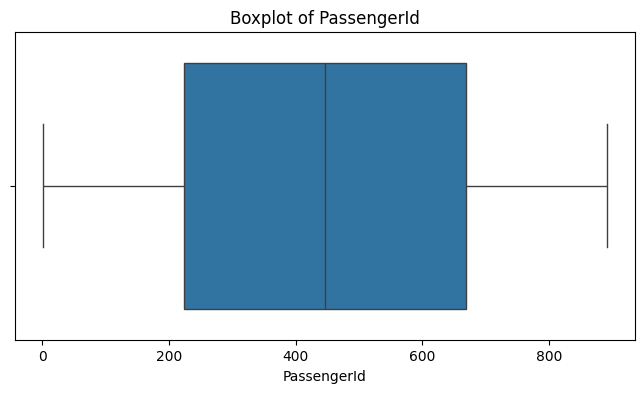

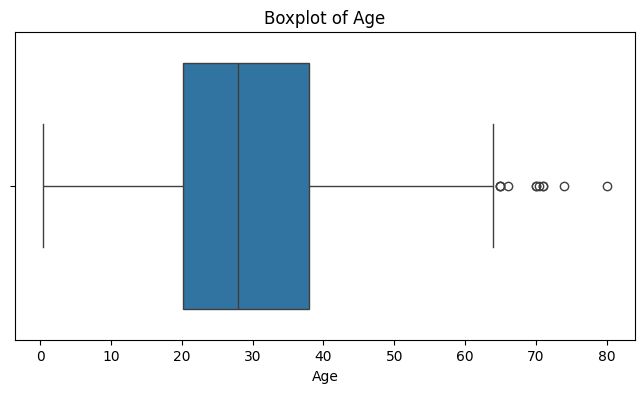

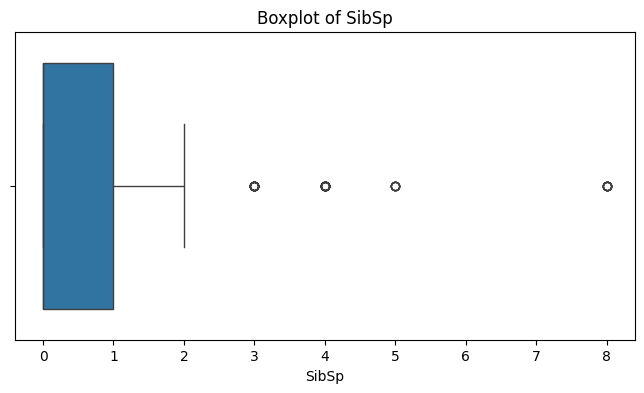

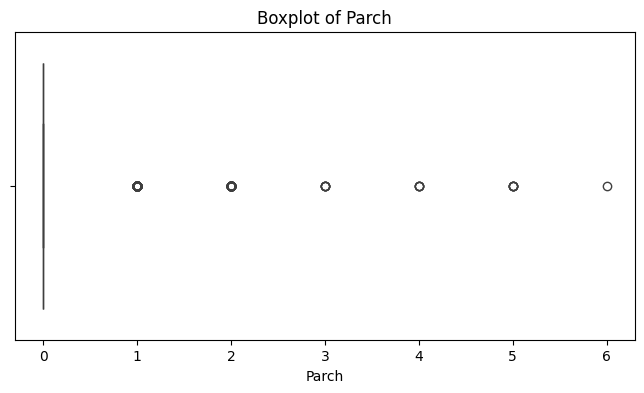

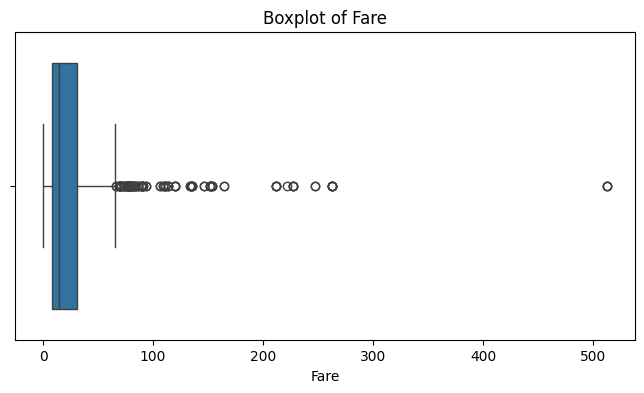

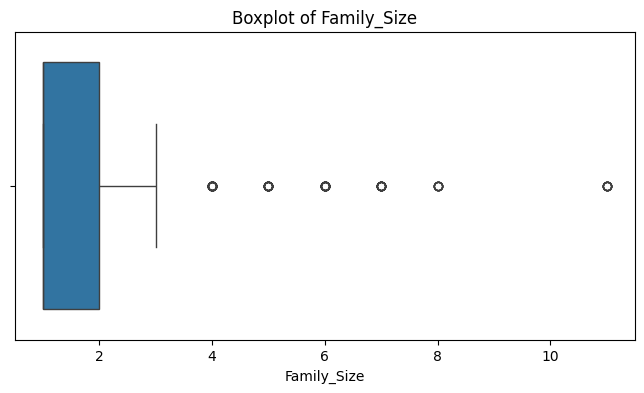

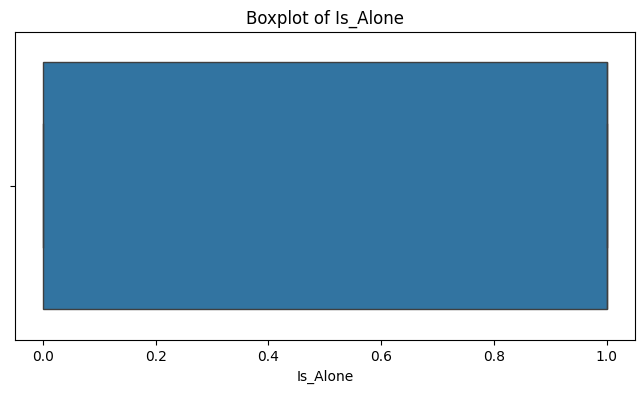

In [205]:
# Outlier Detection
print("\n=== Outlier Detection ===")
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

#### Correlation Analysis
##### Numerical variables


=== Correlation Analysis ===


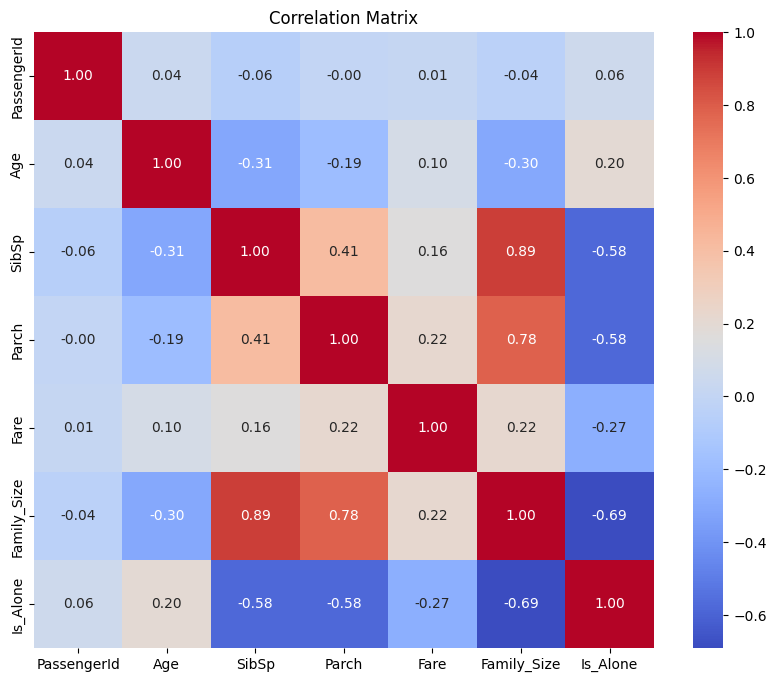

In [206]:
# Correlation Analysis
print("\n=== Correlation Analysis ===")
# corr = train.select_dtypes(include=[np.number]).corr()
corr = train[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### Categorical variables

In [207]:
from scipy.stats import chi2_contingency

pclass_sex_ct = pd.crosstab(train['Pclass'], train['Sex'], normalize='index') * 100
chi2, p, dof, expected = chi2_contingency(pclass_sex_ct)
print(pclass_sex_ct)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Sex        female       male
Pclass                      
1       43.518519  56.481481
2       41.304348  58.695652
3       29.327902  70.672098
Chi-square statistic: 4.945286124448776
p-value: 0.08436159114138103


In [208]:
pclass_deck_ct = pd.crosstab(train['Pclass'], train['Deck'])
chi2, p, dof, expected = chi2_contingency(pclass_deck_ct)
print(pclass_deck_ct)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Deck     A   B   C   D   E  F  G  T  Unknown
Pclass                                      
1       15  47  59  29  25  0  0  1       40
2        0   0   0   4   4  8  0  0      168
3        0   0   0   0   3  5  4  0      479
Chi-square statistic: 652.4083174417347
p-value: 1.7089175823884686e-128


In [209]:
pclass_embarked_ct = pd.crosstab(train['Pclass'], train['Embarked'])
chi2, p, dof, expected = chi2_contingency(pclass_embarked_ct)
print(pclass_embarked_ct)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Embarked   C   Q    S
Pclass               
1         87   2  127
2         17   3  164
3         66  72  353
Chi-square statistic: 127.01330876901444
p-value: 1.6943961447448945e-26


In [210]:
deck_embarked_ct = pd.crosstab(train['Deck'], train['Embarked'])
chi2, p, dof, expected = chi2_contingency(deck_embarked_ct)
print(deck_embarked_ct)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Embarked   C   Q    S
Deck                 
A          7   0    8
B         24   0   23
C         21   2   36
D         13   0   20
E          5   1   26
F          1   1   11
G          0   0    4
T          0   0    1
Unknown   99  73  515
Chi-square statistic: 79.22765349874442
p-value: 2.292006878318455e-10


- It seems that 3rd class passengers are more likely to embark from Southampton, and 1st class passengers are more likely to embark from Cherbourg.
- there is a link between Pclass and Deck but there might be too many categories for a chi2

###### One hot encoding

In [211]:
# one hot encoding
train_df = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked', 'Simplified_Title', 'Deck'], drop_first=True)
test_df = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked', 'Simplified_Title', 'Deck'], drop_first=True)

###### Correlations between the levels of the categorical variables

In [212]:
# Convert categorical variables to dummy/one-hot encoded variables
encoded_df = pd.get_dummies(train[['Pclass', 'Sex', 'Embarked', 'Simplified_Title', 'Deck']], drop_first=True)

# Calculate the correlation matrix on the encoded data
correlation_matrix = encoded_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                           Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
Pclass_2                   1.000000 -0.565210 -0.064746   -0.127301   
Pclass_3                  -0.565210  1.000000  0.137143    0.237449   
Sex_male                  -0.064746  0.137143  1.000000   -0.074115   
Embarked_Q                -0.127301  0.237449 -0.074115    1.000000   
Embarked_S                 0.192061 -0.009511  0.125722   -0.496624   
Simplified_Title_Commoner -0.045726  0.054682 -0.183275   -0.010078   
Simplified_Title_Title     0.061761 -0.176284  0.087097    0.002542   
Deck_B                    -0.120386 -0.261450 -0.109689   -0.072579   
Deck_C                    -0.135851 -0.295036 -0.058649   -0.049776   
Deck_D                    -0.041325 -0.217282 -0.079248   -0.060318   
Deck_E                    -0.038864 -0.177461 -0.047003   -0.037897   
Deck_F                     0.122906 -0.040721 -0.008202   -0.004113   
Deck_G                    -0.034258  0.060612 -0.091031   -0.020654   
Deck_T

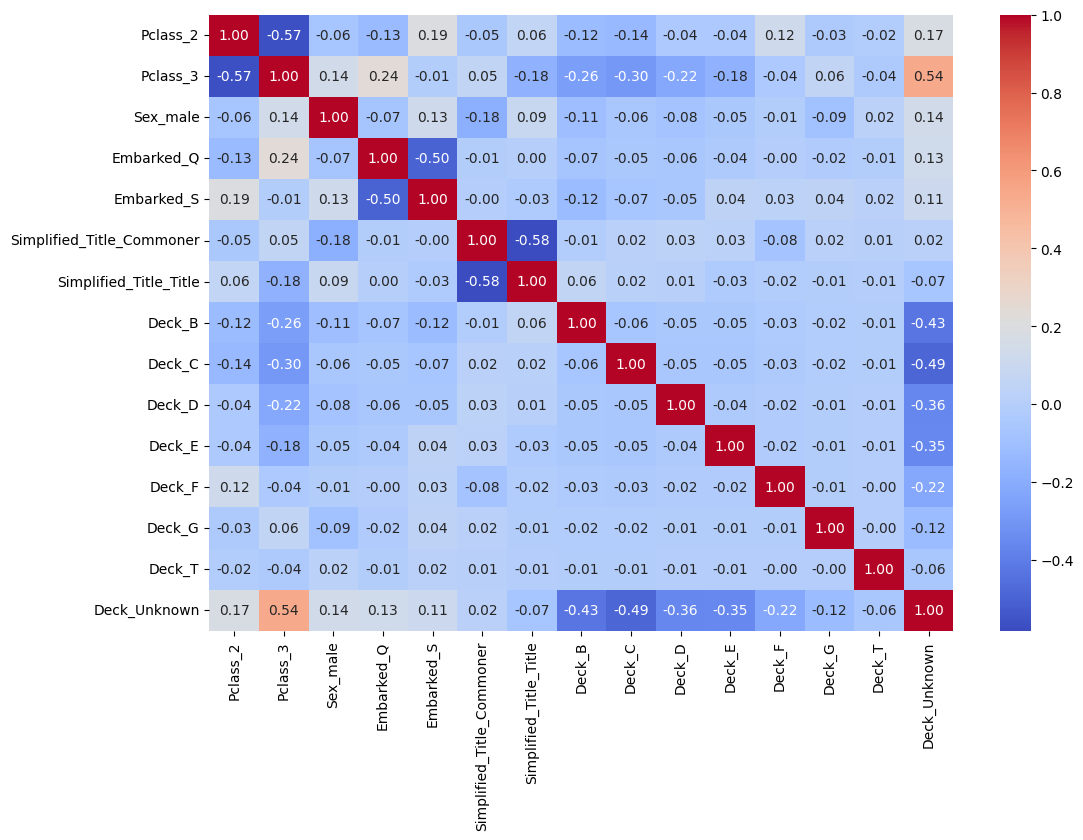

In [213]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

                           Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
Pclass_2                        1.0       NaN       NaN         NaN   
Pclass_3                        NaN       1.0       NaN         NaN   
Sex_male                        NaN       NaN       1.0         NaN   
Embarked_Q                      NaN       NaN       NaN         1.0   
Embarked_S                      NaN       NaN       NaN         NaN   
Simplified_Title_Commoner       NaN       NaN       NaN         NaN   
Simplified_Title_Title          NaN       NaN       NaN         NaN   
Deck_B                          NaN       NaN       NaN         NaN   
Deck_C                          NaN       NaN       NaN         NaN   
Deck_D                          NaN       NaN       NaN         NaN   
Deck_E                          NaN       NaN       NaN         NaN   
Deck_F                          NaN       NaN       NaN         NaN   
Deck_G                          NaN       NaN       NaN         NaN   
Deck_T

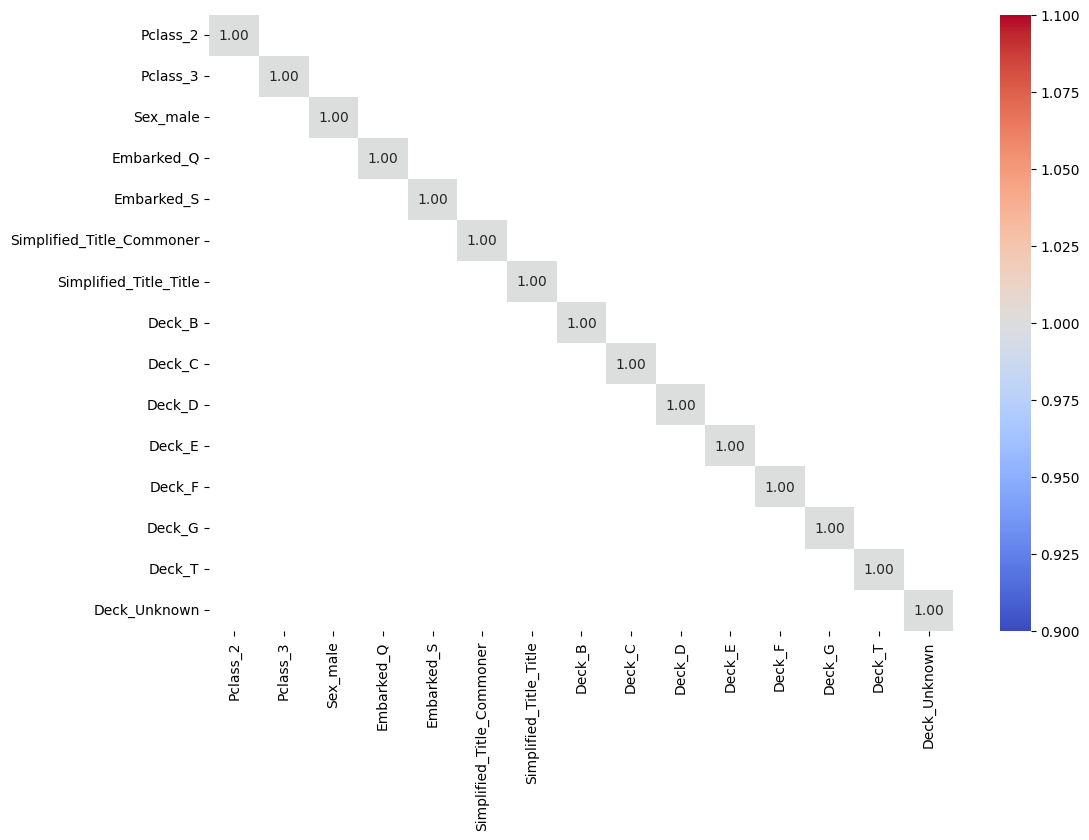

In [214]:
# Filter the correlation matrix for correlations with an absolute value of at least 0.6
filtered_corr_matrix = correlation_matrix[(correlation_matrix.abs() >= 0.6)]

# Drop rows and columns that are entirely NaN (where all correlations were less than 0.6)
filtered_corr_matrix.dropna(how='all', axis=0, inplace=True)
filtered_corr_matrix.dropna(how='all', axis=1, inplace=True)

# Print the filtered correlation matrix
print(filtered_corr_matrix)

# Optional: Visualize the filtered correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Train vs Test

In [215]:
# Compare summary statistics of numerical features
numerical_features = ['Age', 'Fare', 'Parch', 'SibSp']

train_summary = train[numerical_features].describe()
test_summary = test[numerical_features].describe()

print("Train Set Summary Statistics:")
print(train_summary)
print("\nTest Set Summary Statistics:")
print(test_summary)

Train Set Summary Statistics:
              Age        Fare       Parch       SibSp
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.381594    0.523008
std     14.526497   49.693429    0.806057    1.102743
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    0.000000    1.000000
max     80.000000  512.329200    6.000000    8.000000

Test Set Summary Statistics:
              Age        Fare       Parch       SibSp
count  332.000000  418.000000  418.000000  418.000000
mean    30.272590   35.561214    0.392344    0.447368
std     14.181209   55.856789    0.981429    0.896760
min      0.170000    0.000000    0.000000    0.000000
25%     21.000000    7.895800    0.000000    0.000000
50%     27.000000   14.454200    0.000000    0.000000
75%     39.000000   31.471875    0.000000    1.000000
max     76.000000  512

In [216]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test for numerical features
for feature in numerical_features:
    ks_stat, p_value = ks_2samp(train[feature].dropna(), test[feature].dropna())
    print(f"{feature} - KS Statistic: {ks_stat}, P-value: {p_value}")

Age - KS Statistic: 0.04595693699166414, P-value: 0.7023427077378919
Fare - KS Statistic: 0.03877960895504755, P-value: 0.7667475066503155
Parch - KS Statistic: 0.01417685628211944, P-value: 0.9999999704869827
SibSp - KS Statistic: 0.025311595487034082, P-value: 0.9905968490976704


In [217]:
# Function to perform Chi-Square test for a categorical feature
def chi_square_test(train, test, feature):
    train_counts = train[feature].value_counts()
    test_counts = test[feature].value_counts()

    # Combine into a contingency table
    contingency_table = pd.DataFrame([train_counts, test_counts], index=['Train', 'Test']).fillna(0)

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    return chi2, p

# Perform Chi-Square tests for each categorical feature
for feature in categorical_features:
    chi2, p = chi_square_test(train, test, feature)
    print(f"{feature} - Chi-Square: {chi2}, P-value: {p}")

Pclass - Chi-Square: 1.0134212156403517, P-value: 0.6024740965496366
Simplified_Title - Chi-Square: 2.426345081869747, P-value: 0.2972527354486881
Sex - Chi-Square: 0.111202258413833, P-value: 0.7387795114785529
Deck - Chi-Square: 5.128030170181437, P-value: 0.7438085726944139
Embarked - Chi-Square: 7.975616060374664, P-value: 0.018540309410284377


- Pclass and Embarked distributions are not the same between Test and Train.

#### Datasets for analysis

- numerical features:  ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'] 
- categorical features:  ['Pclass', 'Simplified_Title', 'Sex', 'Deck', 'Embarked'] 
- target:  Survived

In [218]:
train_df = train[numerical_features + categorical_features + ['Survived']]
test_df = test[numerical_features + categorical_features]

print(train_df.head())
print(test_df.head())

    Age     Fare  Parch  SibSp Pclass Simplified_Title     Sex     Deck  \
0  22.0   7.2500      0      1      3         Commoner    male  Unknown   
1  38.0  71.2833      0      1      1         Commoner  female        C   
2  26.0   7.9250      0      0      3         Commoner  female  Unknown   
3  35.0  53.1000      0      1      1         Commoner  female        C   
4  35.0   8.0500      0      0      3         Commoner    male  Unknown   

  Embarked  Survived  
0        S         0  
1        C         1  
2        S         1  
3        S         1  
4        S         0  
    Age     Fare  Parch  SibSp Pclass Simplified_Title     Sex     Deck  \
0  34.5   7.8292      0      0      3         Commoner    male  Unknown   
1  47.0   7.0000      0      1      3         Commoner  female  Unknown   
2  62.0   9.6875      0      0      2         Commoner    male  Unknown   
3  27.0   8.6625      0      0      3         Commoner    male  Unknown   
4  22.0  12.2875      1      1      

##### One hot encoding

We can choose the most represented category as the level to drop.

In [219]:
print(train.Pclass.value_counts())
print(train.Embarked.value_counts())
print(train.Sex.value_counts())
print(train.Simplified_Title.value_counts())
print(train.Deck.value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    170
Q     77
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Simplified_Title
Commoner    829
Child        40
Title        22
Name: count, dtype: int64
Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


In [220]:
def one_hot_enc_choose_cat(df):
    """ 
    Function to one hot encode categorical features and drop the most represented category.
    """
    encoded_df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'Simplified_Title', 'Deck'], drop_first=False)
    encoded_df = encoded_df.drop(columns=['Pclass_3', 'Sex_male', 'Simplified_Title_Commoner', 'Deck_Unknown', 'Embarked_S'])
    return encoded_df

In [221]:
encoded_train_df = one_hot_enc_choose_cat(train_df)
encoded_test_df = one_hot_enc_choose_cat(test_df)

## Analyses

### Logistic Regression

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

#### Preprocessing

- Missing values
- Encoding categorical features
- Scaling numerical features
- Train-Test split for validation

##### Missing Values

In [223]:
train_df.loc[:, 'Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df.loc[:, 'Age'] = test_df['Age'].fillna(test_df['Age'].median())

train_df.loc[:, 'Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df.loc[:, 'Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

train_df.loc[:, 'Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df.loc[:, 'Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [224]:
print("train:\n", train_df.isna().sum(), '\n')
print("test:\n", test_df.isna().sum(), '\n')

train:
 Age                 0
Fare                0
Parch               0
SibSp               0
Pclass              0
Simplified_Title    0
Sex                 0
Deck                0
Embarked            0
Survived            0
dtype: int64 

test:
 Age                 0
Fare                0
Parch               0
SibSp               0
Pclass              0
Simplified_Title    0
Sex                 0
Deck                0
Embarked            0
dtype: int64 



##### Encoding categorical features

In [225]:
# one hot encoding
encoded_train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked', 'Simplified_Title', 'Deck'], drop_first=True)
encoded_test_df = pd.get_dummies(test_df, columns=['Pclass', 'Sex', 'Embarked', 'Simplified_Title', 'Deck'], drop_first=True)

#####  Scaling numerical features

In [226]:
scaler = StandardScaler()

encoded_train_df[numerical_features] = scaler.fit_transform(encoded_train_df[numerical_features])
encoded_test_df[numerical_features] = scaler.transform(encoded_test_df[numerical_features])

##### Train-Test split

In [227]:
X_train = encoded_train_df.drop('Survived', axis=1)
y_train = encoded_train_df['Survived']

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#### Modeling

In [228]:
# fit
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_split, y_train_split)

# predict
y_pred = logreg.predict(X_val_split)

# evaluate
print(f'Accuracy: {accuracy_score(y_val_split, y_pred)}')

print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred))

print('Classification Report:')
print(classification_report(y_val_split, y_pred))

Accuracy: 0.8134328358208955
Confusion Matrix:
[[136  21]
 [ 29  82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.74      0.77       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.81      0.81      0.81       268



##### Hyperparameter Tuning

- C (Inverse of Regularization Strength):
A smaller value of C applies stronger regularization, while a larger value reduces regularization.
Expanding the range to [0.01, 0.1, 1, 10, 100, 1000] helps to explore more potential options for tuning regularization strength.

- penalty:
'l1' (Lasso) and 'l2' (Ridge) are commonly used penalties. By adding 'elasticnet', you can combine both L1 and L2 regularization (note: elasticnet requires the solver='saga').
'none' can be tested for a logistic regression without regularization.

- solver:
'liblinear': Good for small datasets and supports L1 and L2 penalties.
'saga': Supports both L1, L2, and elastic-net penalties, and is well-suited for large datasets.
'lbfgs': Supports L2 and is good for handling large datasets and multinomial classification.
'newton-cg': Works similarly to lbfgs and supports only the L2 penalty.

- class_weight:
Adding 'balanced' helps handle class imbalance by adjusting weights inversely proportional to class frequencies.

- max_iter:
Sometimes logistic regression models fail to converge with lower iteration limits. Testing a broader range of values ensures that your model is given enough iterations to converge.

In [229]:
param_grid = {
    'C': [10**(i) for i in range(-4, 3)],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # Added compatible solvers
    'max_iter': [5000, 10000, 50000]
}

grid_search = GridSearchCV(LogisticRegression(max_iter=50000), param_grid, cv=5, verbose=1, error_score='raise')
grid_search.fit(X_train_split, y_train_split)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(max_iter=50000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [5000, 10000, 50000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [230]:
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}


In [231]:
logreg_final = LogisticRegression(max_iter=5000, C=10, penalty='l2', solver='liblinear')
logreg_final.fit(X_train, y_train)

# Predict on the test set
y_pred_final = logreg_final.predict(X_val_split)

# evaluate
print(f'Accuracy: {accuracy_score(y_val_split, y_pred_final)}')

print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred_final))

print('Classification Report:')
print(classification_report(y_val_split, y_pred_final))

Accuracy: 0.8246268656716418
Confusion Matrix:
[[136  21]
 [ 26  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       157
           1       0.80      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



Interpretability

In [232]:
# Coefficients 
coefficients = logreg_final.coef_[0]  

# Pair the feature names with their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficient (optional)
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                      Feature  Coefficient
14                     Deck_E     1.200364
13                     Deck_D     0.848942
11                     Deck_B     0.258385
15                     Deck_F     0.234870
1                        Fare     0.202153
12                     Deck_C    -0.109127
2                       Parch    -0.225262
7                  Embarked_Q    -0.246330
4                    Pclass_2    -0.246527
0                         Age    -0.286625
8                  Embarked_S    -0.473980
18               Deck_Unknown    -0.545656
3                       SibSp    -0.555497
16                     Deck_G    -0.858115
17                     Deck_T    -1.140668
5                    Pclass_3    -1.294379
10     Simplified_Title_Title    -2.857081
6                    Sex_male    -3.175704
9   Simplified_Title_Commoner    -3.181773


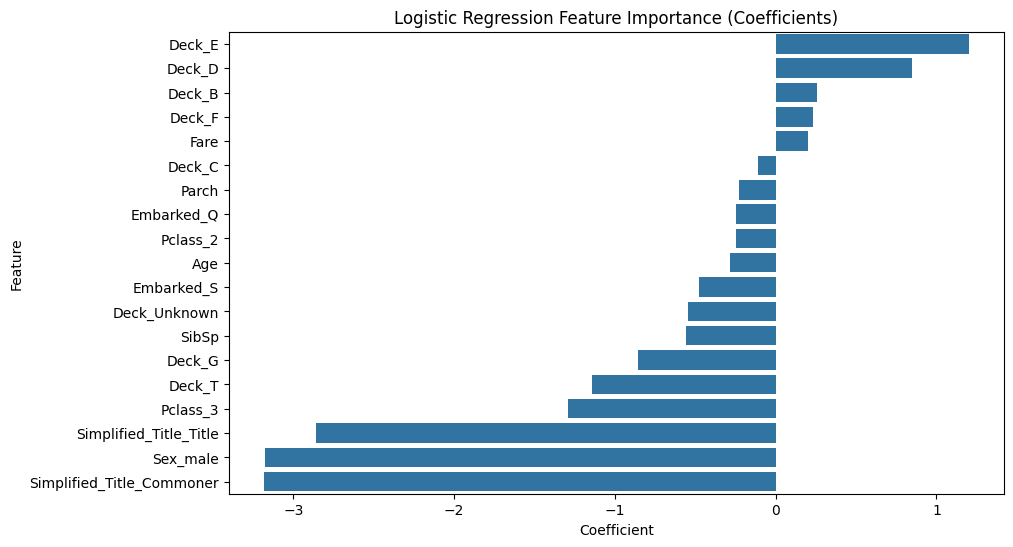

In [233]:
# Visualize the feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Logistic Regression Feature Importance (Coefficients)')
plt.show()

P-values  
The pvalues are not provided with sklearn, we would need to use statsmodels.

In [234]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [235]:
# Convert all boolean columns to integers (0, 1)
X_train = X_train.astype(int)
y_train = y_train.astype(int)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a DataFrame for X_train_scaled with the original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Add a constant for the intercept
X_train_scaled_df = sm.add_constant(X_train_scaled_df)

# Fit the logistic regression model using the DataFrame with named columns
logit_model = sm.Logit(y_train, X_train_scaled_df)
result = logit_model.fit(method='bfgs', maxiter=50000)

# Print the summary (includes p-values, coefficients, etc.)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.398981
         Iterations: 74
         Function evaluations: 75
         Gradient evaluations: 75
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      871
Method:                           MLE   Df Model:                           19
Date:                Mon, 13 Jan 2025   Pseudo R-squ.:                  0.4008
Time:                        15:13:49   Log-Likelihood:                -355.49
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.029e-89
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const   

f1 score : 82%  
variables qui influent significativement sur la survie : Age, Pclass_3, Sexe_male, Title, SibSp, Parch.  
variables significatives sont differentes des feature importantes pour la classification.
car la reg logistique capture bien les relations linéaires, les effes d'une variables qd les autres sont constantes, mais pas les relations complexes.

In [236]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_split_pca = pca.transform(X_val_split)

# Get the percentage of variance explained by each component
explained_variance = pca.explained_variance_ratio_ * 100

# Train the logistic regression model on PCA-transformed data
logreg_final_pca = LogisticRegression(max_iter=5000, C=10, penalty='l2', solver='liblinear')
logreg_final_pca.fit(X_train_pca, y_train)

# Generate mesh grid for PCA space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the grid
Z = logreg_final_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create contour plot for decision boundary
contour = go.Contour(
    z=Z,
    x=np.arange(x_min, x_max, 0.1),
    y=np.arange(y_min, y_max, 0.1),
    colorscale='Viridis',
    opacity=0.7,
    showscale=False,
)

# Plot the training points in PCA space
scatter = go.Scatter(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    mode='markers',
    marker=dict(
        color=y_train,
        colorscale='Portland',
        line=dict(width=1, color='black'),
        size=8
    ),
    text=['Survived: {}'.format(s) for s in y_train]
)

# Set layout for the plot, including percentage of explained variance in axis labels
layout = go.Layout(
    title="Logistic Regression Decision Boundary (PCA Projection)",
    xaxis=dict(title=f"PCA Component 1 ({explained_variance[0]:.2f}% variance explained)"),
    yaxis=dict(title=f"PCA Component 2 ({explained_variance[1]:.2f}% variance explained)"),
    hovermode='closest',
    showlegend=False
)

# Combine contour and scatter plots
fig = go.Figure(data=[contour, scatter], layout=layout)

# Show the plot
fig.show()


### Random Forest

Preprocessing

- Missing values : already dealt with
- One hot encoding
- feature scaling : not necessary
- Train-Test split

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
# One-hot encode categorical features for train and test sets
encoded_train_df = one_hot_enc_choose_cat(train_df)
encoded_test_df = one_hot_enc_choose_cat(test_df)

# Split the target and features in the training data
X_train = encoded_train_df.drop(columns=['Survived'])
y_train = encoded_train_df['Survived']

X_test = encoded_test_df

# Split the training data into a train and validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Modelling

In [239]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = rf_model.predict(X_val_split)

In [240]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val_split, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred))
print('Classification Report:')
print(classification_report(y_val_split, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
[[89 16]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Hyperparameter Tuning

In [241]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, y_train_split)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_best = best_rf_model.predict(X_val_split)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [242]:
# Evaluate the tuned model
print(f'Accuracy after tuning: {accuracy_score(y_val_split, y_pred_best)}')
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred_best))
print('Classification Report:')
print(classification_report(y_val_split, y_pred_best))

# Print the best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')

Accuracy after tuning: 0.8379888268156425
Confusion Matrix:
[[94 11]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Interpretability

Feature importance

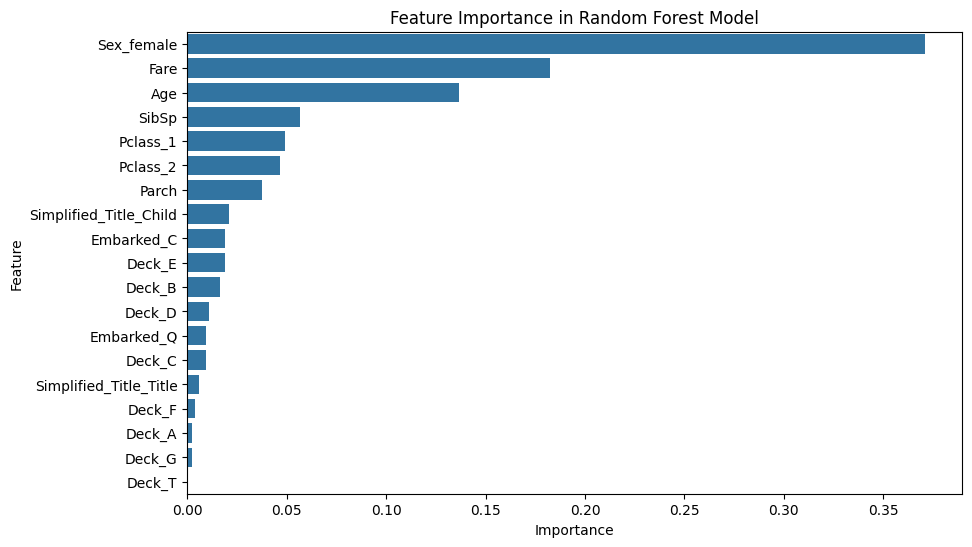

In [243]:
# Get feature importance
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

### XGBoost

Preprocessing

- Missing values: already delt with
- One hot encoding
- featuyre scaling ?
- Train-test split

In [244]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [245]:
# One-hot encode categorical features for train and test sets
encoded_train_df = one_hot_enc_choose_cat(train_df)
encoded_test_df = one_hot_enc_choose_cat(test_df)

# Split the target and features in the training data
X_train = encoded_train_df.drop(columns=['Survived'])
y_train = encoded_train_df['Survived']

X_test = encoded_test_df

# Split the training data into a train and validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ensure the target variable is numeric (integer)
y_train_split = y_train_split.astype(int)
y_val_split = y_val_split.astype(int)


In [246]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = xgb_model.predict(X_val_split)

In [247]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val_split, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred))
print('Classification Report:')
print(classification_report(y_val_split, y_pred))

Accuracy: 0.7877094972067039
Confusion Matrix:
[[87 18]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [248]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, y_train_split)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_best = best_xgb_model.predict(X_val_split)

# Evaluate the tuned model
print(f'Accuracy after tuning: {accuracy_score(y_val_split, y_pred_best)}')
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred_best))
print('Classification Report:')
print(classification_report(y_val_split, y_pred_best))

# Print the best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Accuracy after tuning: 0.8324022346368715
Confusion Matrix:
[[92 13]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}


Interpretability

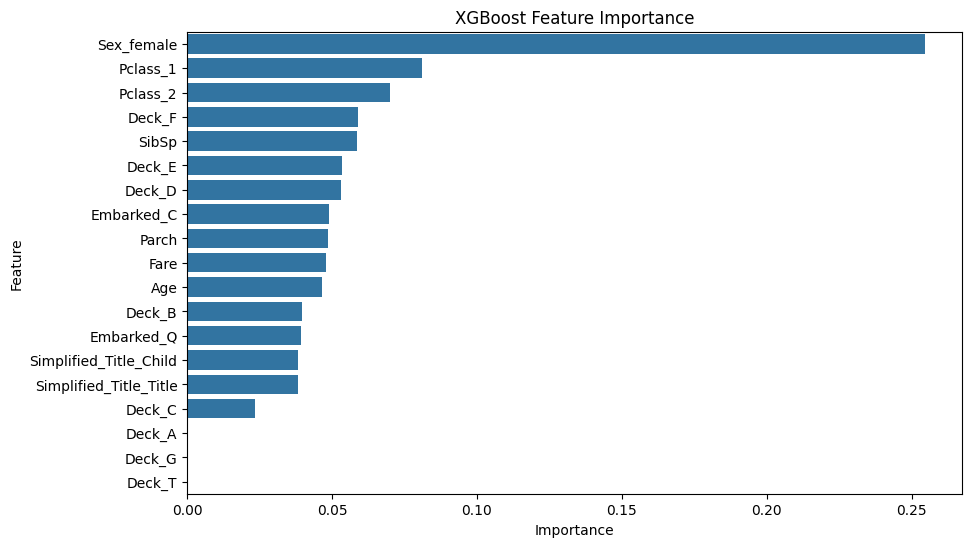

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the best model
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()


### KNN

Preprocessing

- Missing values: already delt with
- One hot encoding
- scaling
- Train-test split 

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [251]:
# One-hot encode categorical features using your existing function
encoded_train_df = one_hot_enc_choose_cat(train_df)
encoded_test_df = one_hot_enc_choose_cat(test_df)

# Scaling the features
scaler = StandardScaler()
encoded_train_df[numerical_features] = scaler.fit_transform(encoded_train_df[numerical_features])
encoded_test_df[numerical_features] = scaler.transform(encoded_test_df[numerical_features])


# Split the target and features in the training data
X_train = encoded_train_df.drop(columns=['Survived'])
y_train = encoded_train_df['Survived'].astype(int)  # Ensure the target is an integer


In [252]:
# Split the training data into a train and validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = knn_model.predict(X_val_split)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val_split, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred))
print('Classification Report:')
print(classification_report(y_val_split, y_pred))

Accuracy: 0.8156424581005587
Confusion Matrix:
[[90 15]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [253]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],  # Consider uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, y_train_split)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_best = best_knn_model.predict(X_val_split)

# Evaluate the tuned model
print(f'Accuracy after tuning: {accuracy_score(y_val_split, y_pred_best)}')
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_pred_best))
print('Classification Report:')
print(classification_report(y_val_split, y_pred_best))

# Print the best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy after tuning: 0.8324022346368715
Confusion Matrix:
[[95 10]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


Interpretability

In [254]:
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_split, feature_names=X_train.columns, class_names=['Died', 'Survived'], discretize_continuous=True)

# Select a single instance from the validation set
instance = X_val_split[0].reshape(1, -1)

# Generate explanation for that instance
exp = explainer.explain_instance(instance.flatten(), best_knn_model.predict_proba)
exp.show_in_notebook(show_all=False)

ameliorer le tuning, + ecrire une synthese de ce que fait chaque technique.

Comparer les perf de chaque modele, et les feature importance.
puis choisir le meilleur pour la soumission.

### Clustering ?  

Pour trouver plus d'info sur les features qui separe les groupes, ou comment les groupes sont séparés.

voir SHAP values, ROC curves, + d'hypermarameter tuning